In [3]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import torch
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
#sys.path.append("../utils")
#from utils.models import ConvLSTMModel


In [4]:
from skimage import measure

In [2]:
RESULTS_PATH = "/home/nick/Desktop/experiments_results/"
TEST_SET_PATH = "/home/nick/Desktop/experiments_results/milan_processed_test.npz"
# RESULTS_PATH  = '/afs/inf.ed.ac.uk/user/s18/s1818503/Desktop/experiments_results/'
# TEST_SET_PATH = '/afs/inf.ed.ac.uk/user/s18/s1818503/Desktop/experiments_results/milan_processed_test.npz'


In [3]:
RESULT_FOLDERS = {
#     'no_scaling' : "conv_lstm_results_before_scaling_i=5_o=15/",
#     'standard'   : "conv_lstm_with_data_standardisation_i=5_o=15/"
    'hzzone' :  'hzzone_conv_lstm/' ,
    'cxiixi' :  'cxiixi_conv_lstm/'
}

### Plots

In [21]:
def plot_learning_curves(label='standard'):

    full_path = RESULTS_PATH+RESULT_FOLDERS[label]
    dfs = {}
    for exp in os.listdir(full_path):
        dfs[exp] = pd.read_csv(full_path+exp+'/result_outputs/summary.csv')
        dfs[exp].drop(["curr_epoch"],axis=1,inplace=True)
    for exp in sorted(dfs.keys()):
        dfs[exp].plot(title=exp,ylim=[0,2600])
    return dfs

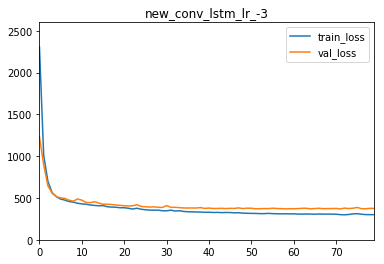

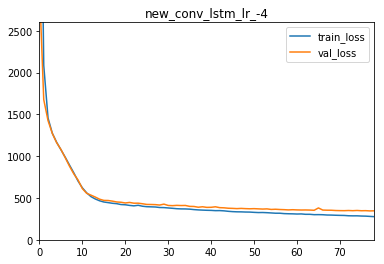

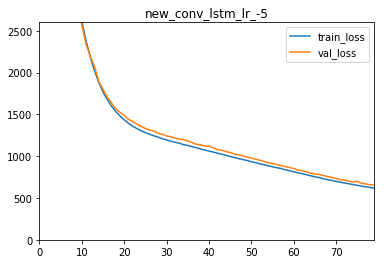

In [22]:
ns_df = plot_learning_curves('hzzone')

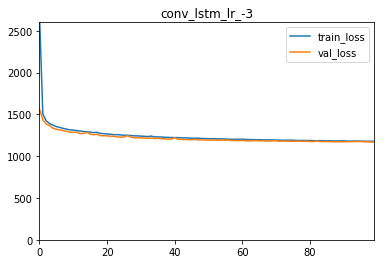

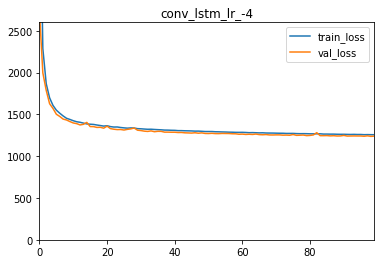

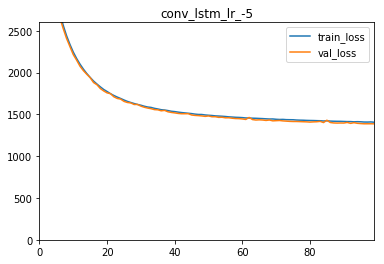

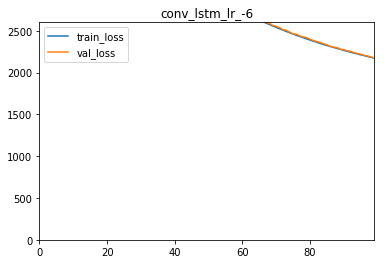

In [23]:
ns_df = plot_learning_curves('cxiixi')

### Prediction vs ground_truth

#### cxiixi

In [19]:
def load_pytorch_model_to_cpu(MODEL_PATH):
    model = ConvLSTMModel(100,12,18,10,False)
    network = torch.load(MODEL_PATH,map_location='cpu')['network']
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for key,value in network.items():
        name = key[6:]
        new_state_dict[name] = value

    model.load_state_dict(new_state_dict)
    model.eval()
    return model

In [20]:
EXP = 'conv_lstm_lr_-3'
MODEL_PATH = RESULTS_PATH + RESULT_FOLDERS['cxiixi'] + EXP +'/saved_models/train_model_latest'
model = load_pytorch_model_to_cpu(MODEL_PATH)
test_data = np.load(TEST_SET_PATH)

In [21]:
x = test_data['x'].transpose(0,3,1,2).astype(np.float32)
y = test_data['y'].transpose(0,3,1,2).astype(np.float32)
y.shape

(430, 6, 100, 100)

In [34]:
i = 332

In [35]:
x.shape

(430, 12, 100, 100)

In [36]:
example_input = torch.Tensor(x[i:i+10,...]).float().to('cpu')
ground_truth  = y[i:i+10,...]
pred = model.forward(example_input)
np_pred = [time_pred[...].detach().numpy().squeeze() for time_pred in pred]
from matplotlib.colors import Normalize

/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [37]:
batch_pred = np.stack(np_pred)

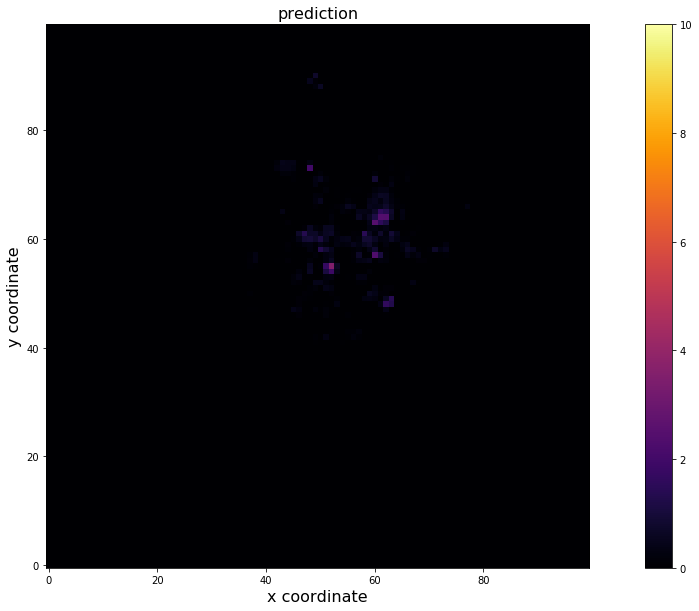

In [48]:
norm = Normalize(vmin=0,vmax=10)
plt.figure(figsize=(20,10))
plt.imshow(batch_pred[0,5],origin='lower',norm=norm,cmap='inferno')
plt.title('prediction',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()

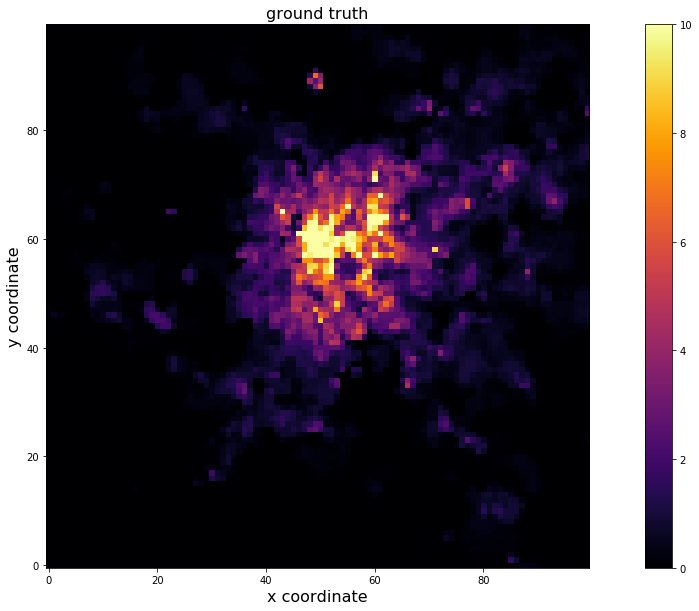

In [49]:

plt.figure(figsize=(20,10))
plt.imshow(ground_truth[0,5],origin='lower',norm=norm,cmap='inferno')
plt.title('ground truth',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()

In [128]:
mse = ((batch_pred - ground_truth)**2).mean()
mse

43.883854

In [127]:
batch_pred[...].shape

(10, 15, 100, 100)

In [120]:
ground_truth.shape

(10, 15, 100, 100)

#### hzzone

In [4]:
from collections import OrderedDict
from evaluation import model_ef,test_dataset,test_data
EXP = 'new_conv_lstm_lr_-3'
MODEL_PATH = RESULTS_PATH + RESULT_FOLDERS['hzzone'] + EXP +'/saved_models/train_model_latest'


In [5]:
def load_pytorch_model_to_cpu(MODEL_PATH):
    model = model_ef
    network = torch.load(MODEL_PATH,map_location='cpu')['network']
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for key,value in network.items():
        name = key[6:]
        new_state_dict[name] = value

    model.load_state_dict(new_state_dict)
    model.eval()
    return model

In [6]:
model = load_pytorch_model_to_cpu(MODEL_PATH)
test_data = np.load(TEST_SET_PATH)

In [45]:
test_data = np.load(TEST_SET_PATH)

x = np.expand_dims(test_data['x'],4).transpose(0,3,4,1,2).astype(np.float32)   
y = np.expand_dims(test_data['y'],4).transpose(3,0,4,1,2).astype(np.float32)   
x.shape

MemoryError: 

In [46]:
i =331

In [27]:
x_tensor = torch.Tensor(x).float().permute(1,0,2,3,4).to('cpu')

In [36]:
example_input = x_tensor [:,i:i+10,...]
example_input.shape

torch.Size([12, 10, 1, 100, 100])

In [11]:
print(model)

EF(
  (encoder): Encoder(
    (stage1): Sequential(
      (conv1_leaky_1): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (leaky_conv1_leaky_1): LeakyReLU(negative_slope=0.2, inplace)
    )
    (rnn1): ConvLSTM(
      (_conv): Conv2d(72, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (stage2): Sequential(
      (conv2_leaky_1): Conv2d(64, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (leaky_conv2_leaky_1): LeakyReLU(negative_slope=0.2, inplace)
    )
    (rnn2): ConvLSTM(
      (_conv): Conv2d(384, 768, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (stage3): Sequential(
      (conv3_leaky_1): Conv2d(192, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (leaky_conv3_leaky_1): LeakyReLU(negative_slope=0.2, inplace)
    )
    (rnn3): ConvLSTM(
      (_conv): Conv2d(384, 768, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (forecaster): Forecaster(
    (rnn3): ConvLSTM(
      (_conv): Conv2

In [29]:
model.eval()
prediction = model(example_input)

In [30]:
np_pred = [time_pred[...].detach().numpy().squeeze() for time_pred in prediction]
from matplotlib.colors import Normalize

In [47]:
ground_truth = y.squeeze()
ground_truth = ground_truth[:, i:i+10,...]
print(ground_truth.shape)
print(len(np_pred))
print()

(6, 10, 100, 100)
6



In [56]:

gt = ground_truth[5,0]
pr = np_pred[5][0]

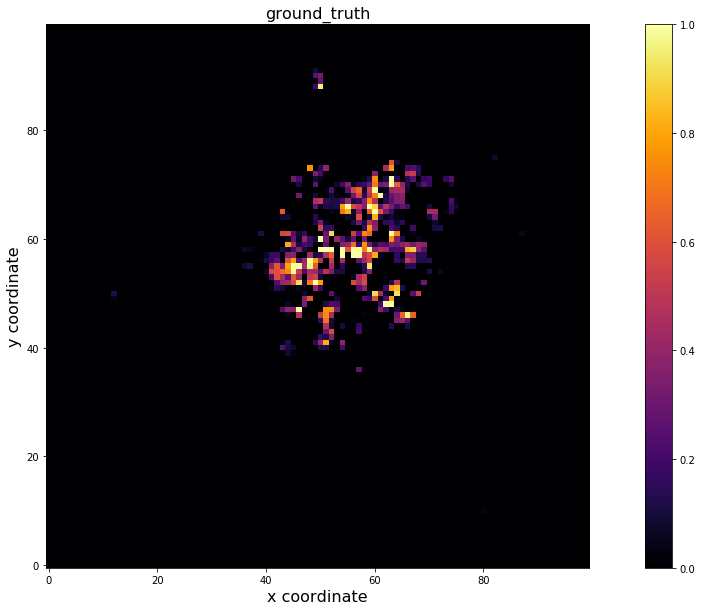

In [57]:
norm = Normalize(vmin=0,vmax=1)
plt.figure(figsize=(20,10))
plt.imshow(gt,origin='lower',norm=norm,cmap='inferno')
plt.title('ground_truth',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()

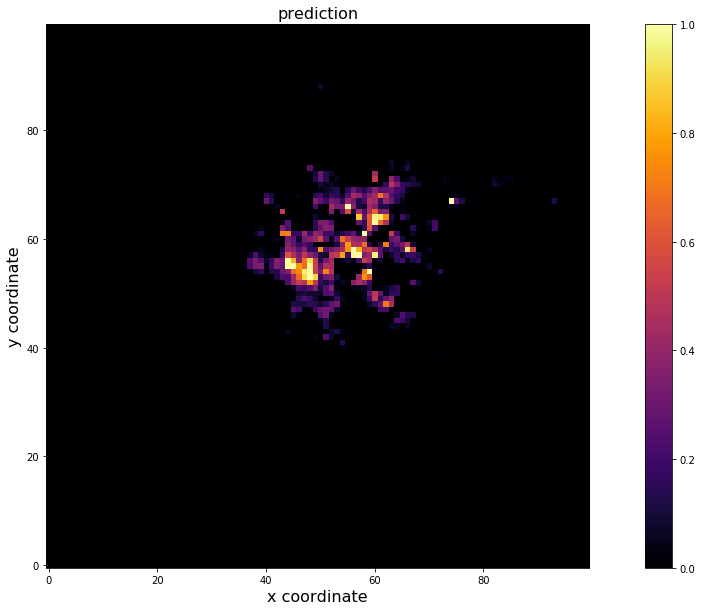

In [58]:

plt.figure(figsize=(20,10))
plt.imshow(pr,origin='lower',norm=norm,cmap='inferno')
plt.title('prediction',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()